<a href="https://colab.research.google.com/github/jmill18/ECGR4106_Homework4/blob/main/ECGR4106_Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install torch==1.12.0 torchvision==0.13.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 42.0 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    Uninstalling torchvision-0.14.1+cu116:
      Successfully uninstalled torchvision-0.14.1+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.14.1 requires torch==1.13.1, but you have torch 1.12.0 which is incompatible.
torchaudio 0.13.1+cu116 requires torch==1.13.1, but you have torch 1.12.0 which is incompatible.


In [2]:
pip install setuptools==66

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.6.1
    Uninstalling setuptools-67.6.1:
      Successfully uninstalled setuptools-67.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [3]:
pip install d2l==1.0.0b0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.6/155.6 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gym
  Running setup.py clean

In [4]:
import torch
from torch import nn as nn
from torch.nn import functional as F
from d2l import torch as d2l

In [5]:
class RNN(d2l.Module):
  def __init__(self, num_inputs, num_hiddens):
    super().__init__()
    self.save_hyperparameters()
    self.rnn = nn.RNN(num_inputs, num_hiddens)

  def forward(self, inputs, H=None):
    return self.rnn(inputs, H)

In [6]:
class RNNLM(d2l.RNNLMScratch):
  def init_params(self):
    self.linear = nn.LazyLinear(self.vocab_size)
  def output_layer(self, hiddens):
    return self.linear(hiddens).swapaxes(0, 1)

In [7]:
class RNNLMScratch(d2l.Classifier):
  def __init__(self, rnn, vocab_size, lr=0.01):
    super().__init__()
    self.save_hyperparameters()
    self.init_params()

  def init_params(self):
    self.W_hq = nn.Parameter(
        torch.randn(
            self.rnn.num_hiddens, self.vocab_size) * self.rnn.sigma)
    self.b_q = nn.Parameter(torch.zeros(self.vocab_size))

  def training_step(self, batch):
    l = self.loss(self(*batch[:-1]), batch[-1])
    self.plot('ppl', torch.exp(l), train=True)
    return l
      
  def validation_step(self, batch):
    l = self.loss(self(*batch[:-1]), batch[-1])
    self.plot('ppl', torch.exp(l), train=False)

In [17]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)
rnn = RNN(num_inputs=len(data.vocab), num_hiddens=32)
model = RNNLM(rnn, vocab_size=len(data.vocab), lr=1)
model.predict('it has', 20, data.vocab)

'it hasrxxxxxxxxxxxxxxxxxxx'

In [18]:
trainer = d2l.Trainer(max_epochs=200, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)
model.predict('it has', 30, data.vocab, d2l.try_gpu())

RuntimeError: ignored

In [8]:
class GRU(d2l.RNN):
  def __init__(self, num_inputs, num_hiddens):
    d2l.Module.__init__(self)
    self.save_hyperparameters()
    self.rnn = nn.GRU(num_inputs, num_hiddens)

In [9]:
trainer = d2l.Trainer(max_epochs=50, gradient_clip_val=1, num_gpus=1)
gru = GRU(num_inputs=len(data.vocab), num_hiddens=32)

model = d2l.RNNLM(gru, vocab_size=len(data.vocab), lr=4)
trainer.fit(model, data)

NameError: ignored

In [10]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())
model.predict('i have', 20, data.vocab, d2l.try_gpu())
model.predict('today i', 20, data.vocab, d2l.try_gpu())

NameError: ignored

In [ ]:
model.predict('i have', 20, data.vocab, d2l.try_gpu())

In [ ]:
gru = GRU(num_inputs=len(data.vocab), num_hiddens=12)
model = d2l.RNNLM(gru, vocab_size=len(data.vocab), lr=4)
trainer.fit(model, data)

In [ ]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

In [ ]:
model.predict('i have', 20, data.vocab, d2l.try_gpu())

In [ ]:
model.predict('today i', 20, data.vocab, d2l.try_gpu())

In [ ]:
gru = GRU(num_inputs=len(data.vocab), num_hiddens=26)
model = d2l.RNNLM(gru, vocab_size=len(data.vocab), lr=4)
trainer.fit(model, data)

In [ ]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

In [ ]:
model.predict('i have', 20, data.vocab, d2l.try_gpu())

In [ ]:
model.predict('today i', 20, data.vocab, d2l.try_gpu())

In [ ]:
gru = GRU(num_inputs=len(data.vocab), num_hiddens=50)
model = d2l.RNNLM(gru, vocab_size=len(data.vocab), lr=4)
trainer.fit(model, data)

In [ ]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

In [ ]:
model.predict('i have', 20, data.vocab, d2l.try_gpu())

In [ ]:
model.predict('today i', 20, data.vocab, d2l.try_gpu())

In [ ]:
gru = GRU(num_inputs=len(data.vocab), num_hiddens=64)
model = d2l.RNNLM(gru, vocab_size=len(data.vocab), lr=4)
trainer.fit(model, data)

In [ ]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

In [ ]:
model.predict('i have', 20, data.vocab, d2l.try_gpu())

In [ ]:
model.predict('today i', 20, data.vocab, d2l.try_gpu())

In [ ]:
gru = GRU(num_inputs=len(data.vocab), num_hiddens=128)
model = d2l.RNNLM(gru, vocab_size=len(data.vocab), lr=4)
trainer.fit(model, data)

In [ ]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

In [ ]:
model.predict('i have', 20, data.vocab, d2l.try_gpu())

In [ ]:
model.predict('today i', 20, data.vocab, d2l.try_gpu())

In [11]:
class LSTMScratch(d2l.Module):
  def __init__(self, num_inputs, num_hiddens, sigma=0.01):
    super().__init__()
    self.save_hyperparameters()

    init_weight = lambda *shape: nn.Parameter(torch.randn(*shape) * sigma)
    triple = lambda: (init_weight(num_inputs, num_hiddens),
                      init_weight(num_hiddens, num_hiddens),
                      nn.Parameter(torch.zeros(num_hiddens)))
    self.W_xi, self.W_hi, self.b_i = triple() #input gate
    self.W_xf, self.W_hf, self.b_f = triple() #Forget gate
    self.W_xo, self.W_ho, self.b_o = triple() #Output gate
    self.W_xc, self.W_hc, self.b_c = triple() #input node

In [12]:
@d2l.add_to_class(LSTMScratch)
def forward(self, inputs, H_C=None):
  if H_C is None:
    H = torch.zeros((inputs.shape[1], self.num_hiddens),
                    device=inputs.device)
    C = torch.zeros((inputs.shape[1], self.num_hiddens),
                    device=inputs.device)
    
  else:
    H, C = H_C
  outputs = []
  for X in inputs:
    I = torch.sigmoid(torch.matmul(X, self.W_xi) +
                      torch.matmul(H, self.W_hi) + self.b_i)
    F = torch.sigmoid(torch.matmul(X, self.W_xf) + 
                      torch.matmul(H, self.W_hf) + self.b_f)
    O = torch.sigmoid(torch.matmul(X, self.W_xo) +
                      torch.matmul(H, self.W_ho) + self.b_o)
    C_tilde = torch.tanh(torch.matmul(X, self.W_xc) +
                         torch.matmul(H, self.W_hc) + self.b_c)
    C = F * C + I * C_tilde
    H = O * torch.tanh(C)
    outputs.append(H)
  return outputs, (H, C)

In [ ]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)
lstm = LSTMScratch(num_inputs=len(data.vocab), num_hiddens=32)
model = d2l.RNNLMScratch(lstm, vocab_size=len(data.vocab), lr=4)
trainer = d2l.Trainer(max_epochs=50, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [ ]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

In [ ]:
model.predict('i have', 20, data.vocab, d2l.try_gpu())

In [ ]:
model.predict('today i', 20, data.vocab, d2l.try_gpu())

In [ ]:
lstm = LSTMScratch(num_inputs=len(data.vocab), num_hiddens=12)
model = d2l.RNNLMScratch(lstm, vocab_size=len(data.vocab), lr=4)
trainer.fit(model, data)

In [ ]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

In [ ]:
model.predict('i have', 20, data.vocab, d2l.try_gpu())

In [ ]:
model.predict('today i', 20, data.vocab, d2l.try_gpu())

In [ ]:
lstm = LSTMScratch(num_inputs=len(data.vocab), num_hiddens=26)
model = d2l.RNNLMScratch(lstm, vocab_size=len(data.vocab), lr=4)
trainer.fit(model, data)

In [ ]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

In [ ]:
model.predict('i have', 20, data.vocab, d2l.try_gpu())

In [ ]:
model.predict('today i', 20, data.vocab, d2l.try_gpu())

In [ ]:
lstm = LSTMScratch(num_inputs=len(data.vocab), num_hiddens=50)
model = d2l.RNNLMScratch(lstm, vocab_size=len(data.vocab), lr=4)
trainer.fit(model, data)

In [ ]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

In [ ]:
model.predict('i have', 20, data.vocab, d2l.try_gpu())

In [ ]:
model.predict('today i', 20, data.vocab, d2l.try_gpu())

In [ ]:
lstm = LSTMScratch(num_inputs=len(data.vocab), num_hiddens=64)
model = d2l.RNNLMScratch(lstm, vocab_size=len(data.vocab), lr=4)
trainer.fit(model, data)

In [ ]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

In [ ]:
model.predict('i have', 20, data.vocab, d2l.try_gpu())

In [ ]:
model.predict('today i', 20, data.vocab, d2l.try_gpu())

In [ ]:
lstm = LSTMScratch(num_inputs=len(data.vocab), num_hiddens=128)
model = d2l.RNNLMScratch(lstm, vocab_size=len(data.vocab), lr=4)
trainer.fit(model, data)

In [ ]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

In [ ]:
model.predict('i have', 20, data.vocab, d2l.try_gpu())

In [ ]:
model.predict('today i', 20, data.vocab, d2l.try_gpu())

In [ ]:
rnn = RNN(num_inputs=len(data.vocab), num_hiddens=48)
rnn48 = RNNLM(rnn, vocab_size=len(data.vocab), lr=1)

In [ ]:
gru = GRU(num_inputs=len(data.vocab), num_hiddens=48)
gru48 = d2l.RNNLM(gru, vocab_size=len(data.vocab), lr=4)

In [ ]:
lstm = LSTMScratch(num_inputs=len(data.vocab), num_hiddens=48)
lstm48 = d2l.RNNLMScratch(lstm, vocab_size=len(data.vocab), lr=4)

In [ ]:
trainer.fit(rnn48, data)

In [ ]:
trainer.fit(gru48, data)

In [ ]:
trainer.fit(lstm48, data)

In [ ]:
rnn48.predict('it has', 20, data.vocab, d2l.try_gpu())

In [ ]:
rnn48.predict('i have', 20, data.vocab, d2l.try_gpu())

In [ ]:
rnn48.predict('today i', 20, data.vocab, d2l.try_gpu())

In [ ]:
gru48.predict('it has', 20, data.vocab, d2l.try_gpu())

In [ ]:
gru48.predict('i have', 20, data.vocab, d2l.try_gpu())

In [ ]:
gru48.predict('today i', 20, data.vocab, d2l.try_gpu())

In [ ]:
lstm48.predict('it has', 20, data.vocab, d2l.try_gpu())

In [ ]:
lstm48.predict('i have', 20, data.vocab, d2l.try_gpu())

In [ ]:
lstm48.predict('today i', 20, data.vocab, d2l.try_gpu())

In [ ]:
pip install ptflops

In [ ]:
from ptflops import get_model_complexity_info

with torch.cuda.device(0):
  macs, params = get_model_complexity_info(rnn48, (1024, len(data.vocab)), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30} {:<8}'.format('Computational complexity ', macs))
  print('{:<30} {:<8}'.format('Number of parameters: ', params))

In [13]:
class GRUScratch(d2l.Module):
    def __init__(self, num_inputs, num_hiddens, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()

        init_weight = lambda *shape: nn.Parameter(torch.randn(*shape) * sigma)
        triple = lambda: (init_weight(num_inputs, num_hiddens),
                          init_weight(num_hiddens, num_hiddens),
                          nn.Parameter(torch.zeros(num_hiddens)))
        self.W_xz, self.W_hz, self.b_z = triple()  # Update gate
        self.W_xr, self.W_hr, self.b_r = triple()  # Reset gate
        self.W_xh, self.W_hh, self.b_h = triple()  # Candidate hidden state

In [14]:
@d2l.add_to_class(GRUScratch)
def forward(self, inputs, H=None):
    if H is None:
        # Initial state with shape: (batch_size, num_hiddens)
        H = torch.zeros((inputs.shape[1], self.num_hiddens),
                      device=inputs.device)
    outputs = []
    for X in inputs:
        Z = torch.sigmoid(torch.matmul(X, self.W_xz) +
                        torch.matmul(H, self.W_hz) + self.b_z)
        R = torch.sigmoid(torch.matmul(X, self.W_xr) +
                        torch.matmul(H, self.W_hr) + self.b_r)
        H_tilde = torch.tanh(torch.matmul(X, self.W_xh) +
                           torch.matmul(R * H, self.W_hh) + self.b_h)
        H = Z * H + (1 - Z) * H_tilde
        outputs.append(H)
    return outputs, H

In [15]:
class StackedGRUScratch(d2l.Module):
  def __init__(self, num_inputs, num_hiddens, num_layers, sigma=0.01):
    super().__init__()
    self.save_hyperparameters()
    self.rnns = nn.Sequential(*[GRUScratch(
        num_inputs if i==0 else num_hiddens, num_hiddens)
      for i in range(num_layers)
    ])

  def forward(self, inputs, Hs=None):
    outputs = inputs
    if Hs is None: Hs = [None] * self.num_layers
    for i in range(self.num_layers):
      outputs, Hs[i] = self.rnns[i](outputs, Hs[i])
      outputs = torch.stack(outputs, 0)
    return outputs, Hs

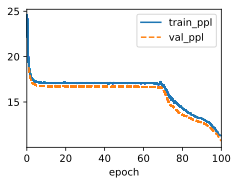

In [20]:
rnn_block = StackedGRUScratch(num_inputs=len(data.vocab),
                              num_hiddens=32, num_layers=2)
model = d2l.RNNLMScratch(rnn_block, vocab_size=len(data.vocab), lr=2)
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [21]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

'it has the the the the the'

In [22]:
model.predict('i have', 20, data.vocab, d2l.try_gpu())

'i have the the the the the'

In [23]:
model.predict('today i', 20, data.vocab, d2l.try_gpu())

'today in the the the the th'

In [16]:
class StackedLSTMScratch(d2l.Module):
  def __init__(self, num_inputs, num_hiddens, num_layers, sigma=0.01):
    super().__init__()
    self.save_hyperparameters()
    self.rnns = nn.Sequential(*[LSTMScratch(
        num_inputs if i==0 else num_hiddens, num_hiddens)
      for i in range(num_layers)
    ])

  def forward(self, inputs, Hs=None):
    outputs = inputs
    if Hs is None: Hs = [None] * self.num_layers
    for i in range(self.num_layers):
      outputs, Hs[i] = self.rnns[i](outputs, Hs[i])
      outputs = torch.stack(outputs, 0)
    return outputs, Hs

In [ ]:
rnn_block = StackedLSTMScratch(num_inputs=len(data.vocab),
                              num_hiddens=32, num_layers=2)
model = d2l.RNNLMScratch(rnn_block, vocab_size=len(data.vocab), lr=2)
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [ ]:
model.predict('it has', 40, data.vocab, d2l.try_gpu())

In [ ]:
model.predict('i have', 20, data.vocab, d2l.try_gpu())

In [ ]:
model.predict('today i', 20, data.vocab, d2l.try_gpu())

In [17]:
class StackedLSTM(d2l.Module):
  def __init__(self, num_inputs, num_hiddens, num_layers, sigma=0.01):
    super().__init__()
    self.save_hyperparameters()
    self.rnns = nn.Sequential(*[nn.LSTM(
        num_inputs if i==0 else num_hiddens, num_hiddens)
      for i in range(num_layers)
    ])

  def forward(self, inputs, Hs=None):
    outputs = inputs
    if Hs is None: Hs = [None] * self.num_layers
    for i in range(self.num_layers):
      outputs, Hs[i] = self.rnns[i](outputs, Hs[i])
      outputs = torch.stack(outputs, 0)
    return outputs, Hs

In [19]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)
rnn_block = StackedLSTM(num_inputs=len(data.vocab),
                              num_hiddens=32, num_layers=2)
model = d2l.RNNLMScratch(rnn_block, vocab_size=len(data.vocab), lr=2)
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

TypeError: ignored

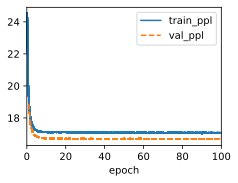

In [24]:
rnn_block = StackedGRUScratch(num_inputs=len(data.vocab),
                              num_hiddens=32, num_layers=3)
model = d2l.RNNLMScratch(rnn_block, vocab_size=len(data.vocab), lr=2)
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [25]:
model.predict('it has', 40, data.vocab, d2l.try_gpu())

'it has                                        '

In [26]:
model.predict('i have', 20, data.vocab, d2l.try_gpu())

'i have                    '

In [27]:
model.predict('today i', 20, data.vocab, d2l.try_gpu())

'today i                    '

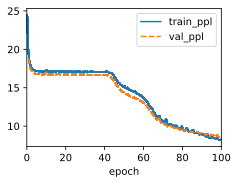

In [28]:
rnn_block = StackedGRUScratch(num_inputs=len(data.vocab),
                              num_hiddens=64, num_layers=2)
model = d2l.RNNLMScratch(rnn_block, vocab_size=len(data.vocab), lr=2)
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [29]:
model.predict('it has', 40, data.vocab, d2l.try_gpu())

'it has the the the the the the the the the the'

In [30]:
model.predict('i have', 40, data.vocab, d2l.try_gpu())

'i have the the the the the the the the the the'

In [31]:
model.predict('today i', 40, data.vocab, d2l.try_gpu())

'today in the the the the the the the the the th'

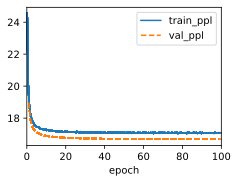

In [32]:
rnn_block = StackedLSTMScratch(num_inputs=len(data.vocab),
                              num_hiddens=32, num_layers=2)
model = d2l.RNNLMScratch(rnn_block, vocab_size=len(data.vocab), lr=2)
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [33]:
model.predict('it has', 40, data.vocab, d2l.try_gpu())

'it has                                        '

In [34]:
model.predict('i have', 40, data.vocab, d2l.try_gpu())

'i have                                        '

In [35]:
model.predict('today i', 40, data.vocab, d2l.try_gpu())

'today i                                        '

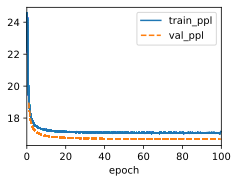

In [36]:
rnn_block = StackedLSTMScratch(num_inputs=len(data.vocab),
                              num_hiddens=32, num_layers=3)
model = d2l.RNNLMScratch(rnn_block, vocab_size=len(data.vocab), lr=2)
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [37]:
model.predict('it has', 40, data.vocab, d2l.try_gpu())

'it has                                        '

In [38]:
model.predict('i have', 40, data.vocab, d2l.try_gpu())

'i have                                        '

In [39]:
model.predict('today i', 40, data.vocab, d2l.try_gpu())

'today i                                        '

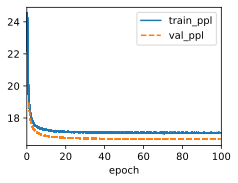

In [40]:
rnn_block = StackedLSTMScratch(num_inputs=len(data.vocab),
                              num_hiddens=64, num_layers=2)
model = d2l.RNNLMScratch(rnn_block, vocab_size=len(data.vocab), lr=2)
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [41]:
model.predict('it has', 40, data.vocab, d2l.try_gpu())

'it has                                        '

In [42]:
model.predict('i have', 40, data.vocab, d2l.try_gpu())

'i have                                        '

In [43]:
model.predict('today i', 40, data.vocab, d2l.try_gpu())

'today i                                        '